In [194]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [195]:
df = pd.read_csv("tourist_data.csv")

## Customer dataset for travel agency

This dataset contains information about customers of a travel agency, such as their age, type of contact, city tier, duration of pitch, occupation, gender, number of persons visiting, number of followups, product pitched, preferred property star, marital status, number of trips, passport, pitch satisfaction score, own car, number of children visiting, and designation.

The columns in the dataset are:

* CustomerID: Unique identifier for each customer
* Age: Age of the customer
* Type of contact: How the customer was contacted (self-enquiry, company invited)
* City tier: Tier of the city where the customer lives (1, 2, 3, 4)
* Duration of pitch: Duration of the pitch in minutes
* Occupation: Occupation of the customer
* Gender: Gender of the customer
* Number of persons visiting: Number of people visiting with the customer
* Number of followups: Number of followups made by the travel agency
* Product pitched: Product pitched to the customer
* Preferred property star: Preferred star rating of the property
* Marital status: Marital status of the customer
* Number of trips: Number of trips taken by the customer in the past year
* Passport: Whether the customer has a passport
* Pitch satisfaction score: Score of the customer's satisfaction with the pitch
* Own car: Whether the customer owns a car
* Number of children visiting: Number of children visiting with the customer
* Designation: Designation of the customer (manager, senior manager, AVP, VP)


In [196]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [197]:
df.drop("CustomerID",axis=1,inplace=True)

In [198]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [199]:
df.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [201]:
missing_cols_perc = df.isnull().mean()*100
missing_cols_perc

ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [202]:
missing_cols = missing_cols_perc[missing_cols_perc>0].index.to_list()
missing_cols

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

# Univariate Analysis 

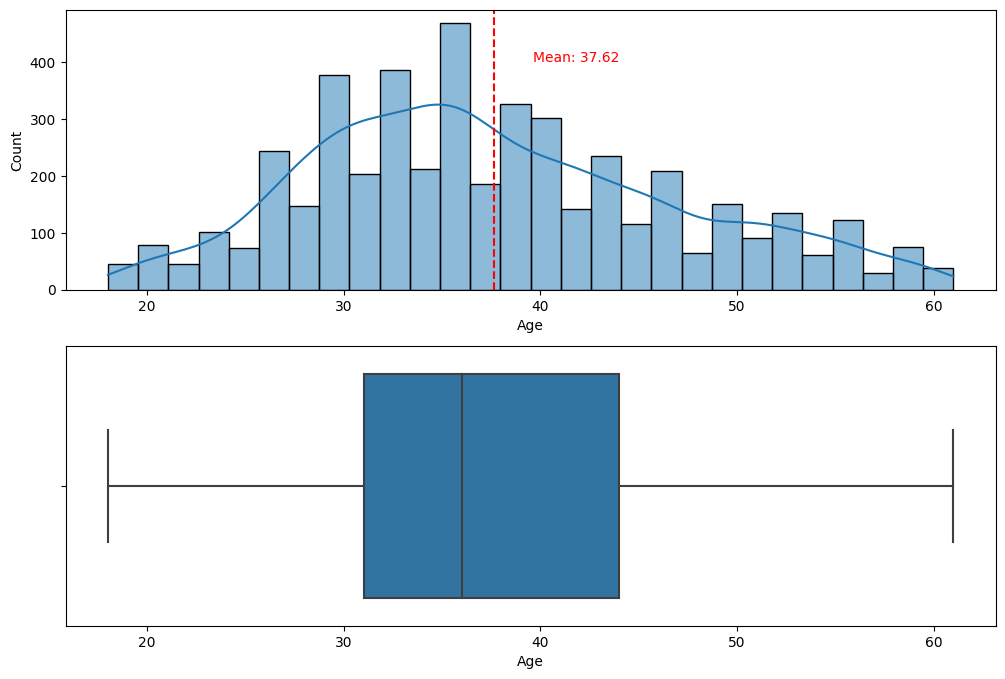

In [203]:

fig,ax = plt.subplots(2,1, figsize=(12, 8))

sns.histplot(data=df,x="Age",kde=True,ax=ax[0])
sns.boxplot(data=df,x="Age",ax=ax[1])
ax[0].axvline(df["Age"].mean(), color="red", linestyle="--")
ax[0].text(df["Age"].mean() +2 , 400, f"Mean: {df['Age'].mean():.2f}", color="red")

plt.show()

Age is normally distrbuted with mean 37.62. Data doesn't contain outliers.

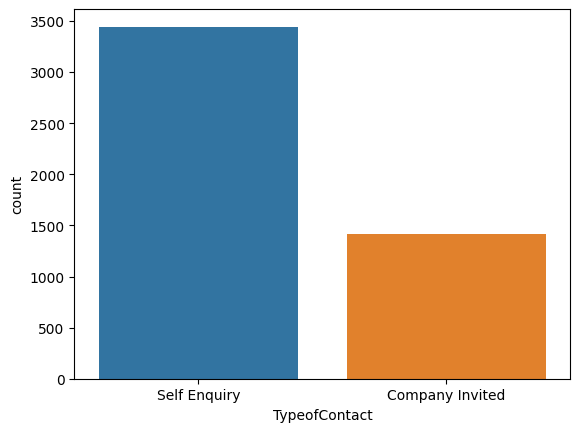

In [204]:
sns.countplot(data=df,x="TypeofContact")
plt.show()

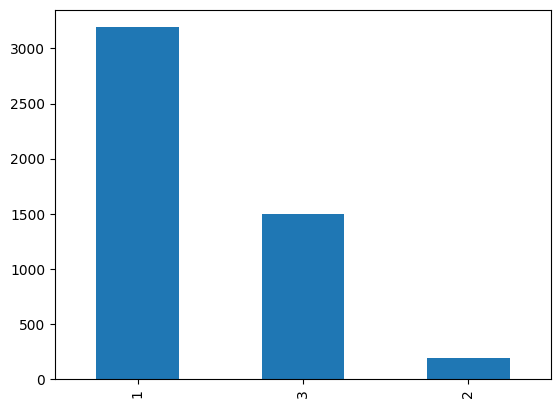

In [205]:
df["CityTier"].astype("object").value_counts().plot(kind="bar")
plt.show()

Most of the customers belongs to the tier 1 cities followed by tier 3 and tier 2. 

In [206]:
df["DurationOfPitch"] = df["DurationOfPitch"].astype("float")

In [207]:
df["DurationOfPitch"].dtype

dtype('float64')

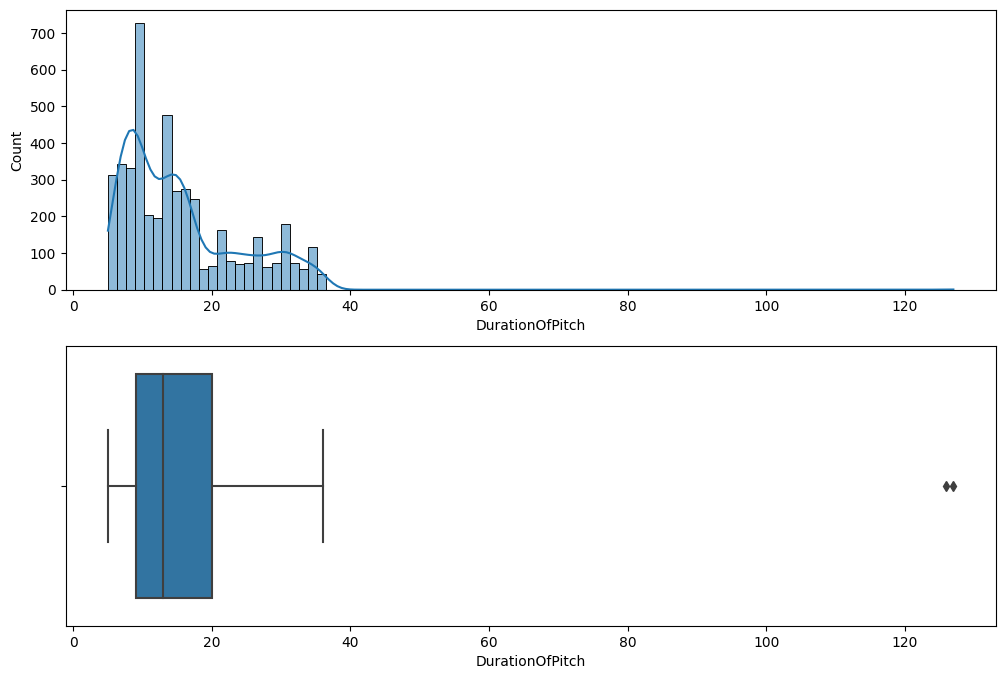

In [208]:

fig,ax = plt.subplots(2,1, figsize=(12, 8))

sns.histplot(data=df,x="DurationOfPitch",kde=True,ax=ax[0])
sns.boxplot(data=df,x="DurationOfPitch",ax=ax[1])
plt.show()

Pitch duration is right skewed. Duration of Pitch has multiple modes.Data also contains outliers.


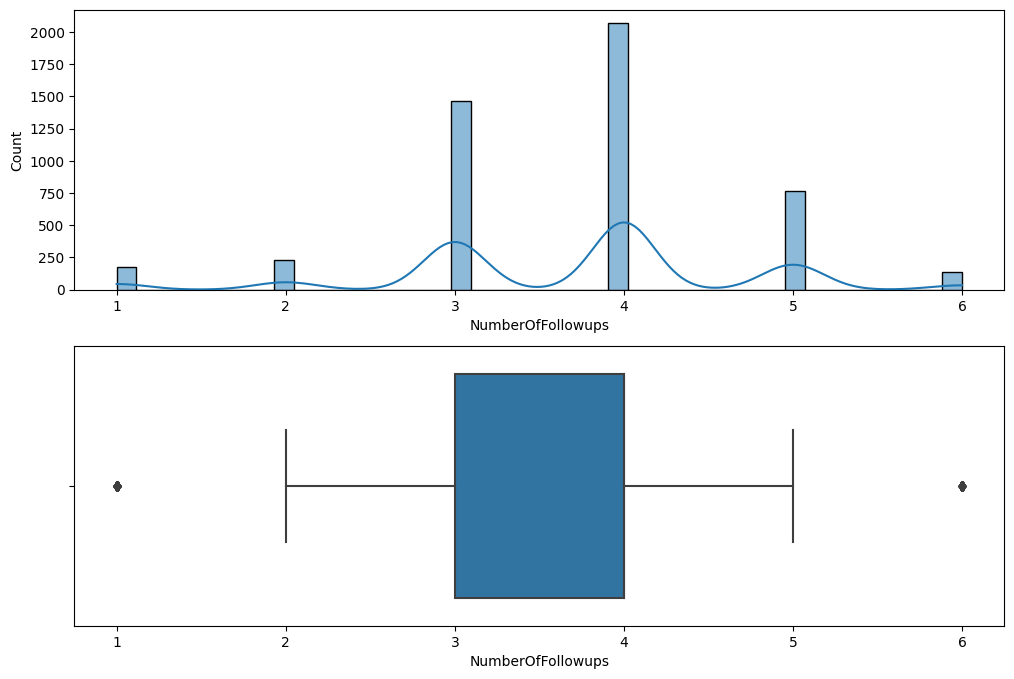

In [209]:
fig,ax = plt.subplots(2,1, figsize=(12, 8))

sns.histplot(data=df,x="NumberOfFollowups",kde=True,ax=ax[0])
sns.boxplot(data=df,x="NumberOfFollowups",ax=ax[1])
plt.show()

Number of Follow ups instead of float values should be type of object. 

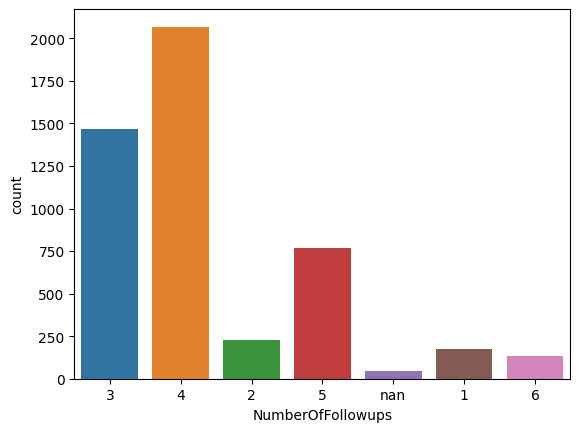

In [210]:

sns.countplot(x=df["NumberOfFollowups"].astype("str").str.replace(".0",""))
plt.show()

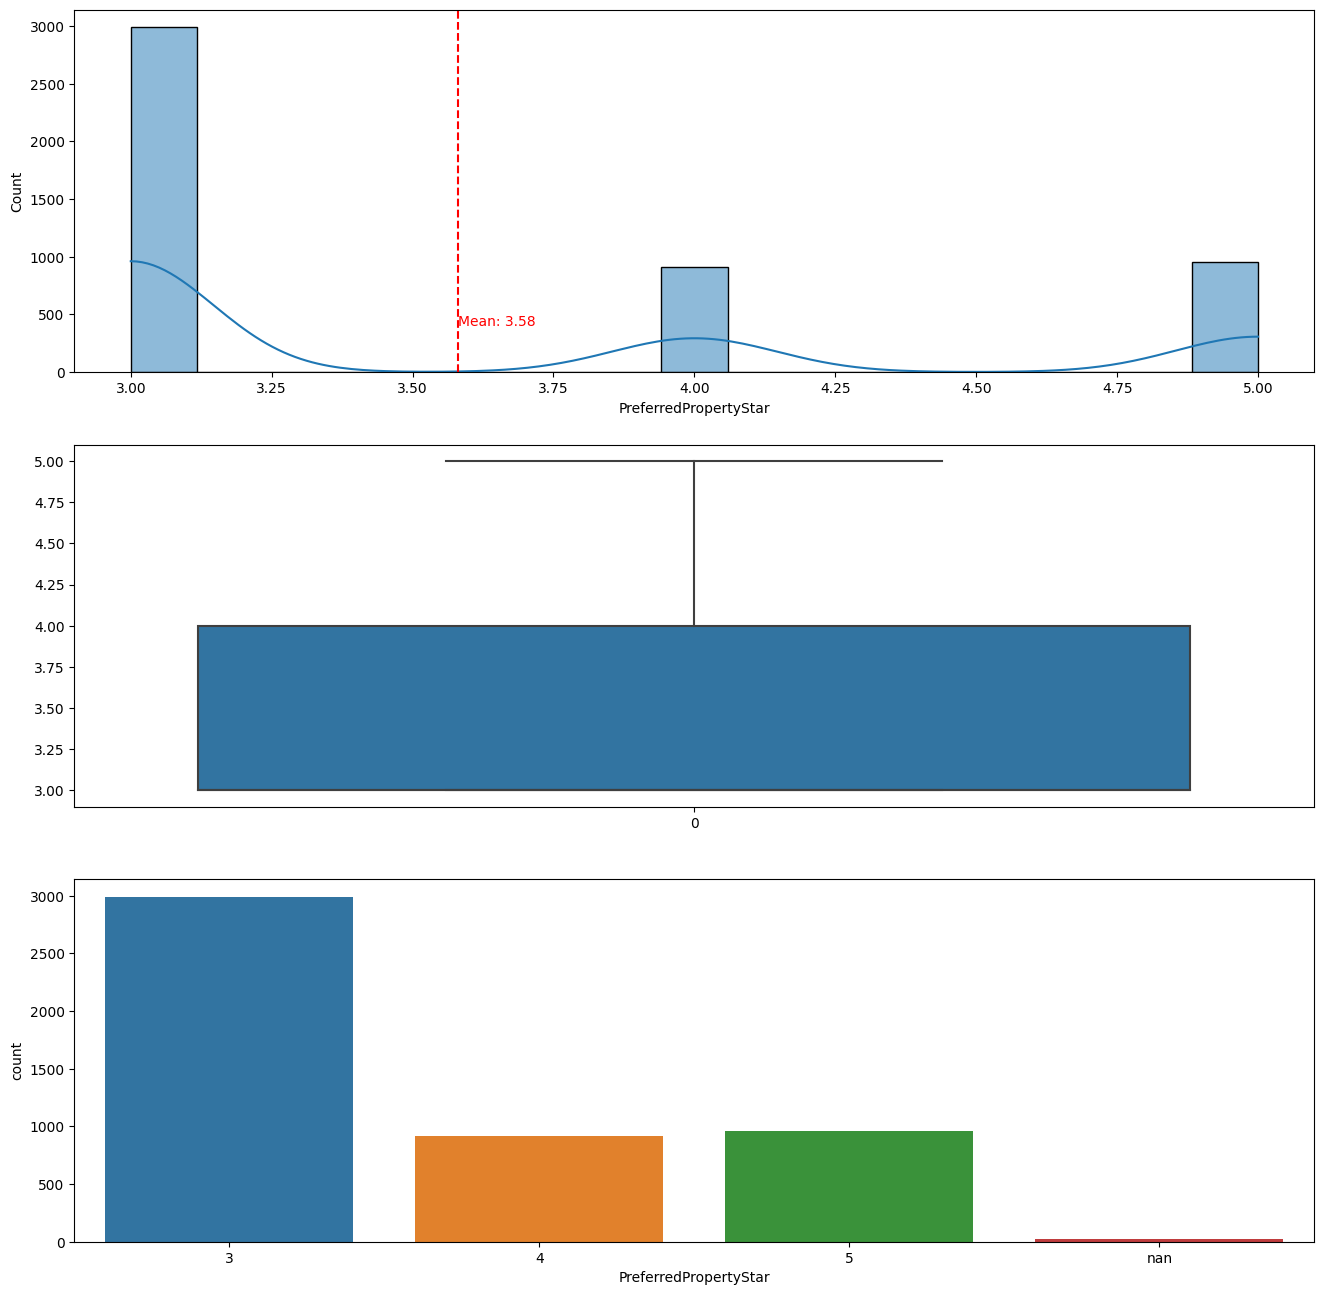

In [211]:
fig, ax = plt.subplots(3,1,figsize=(16,16))
sns.histplot(df["PreferredPropertyStar"],kde=True,ax=ax[0])
ax[0].axvline(df["PreferredPropertyStar"].mean(), color="red", linestyle="--")
ax[0].text(df["PreferredPropertyStar"].mean() , 400, f"Mean: {df['PreferredPropertyStar'].mean():.2f}", color="red")
sns.boxplot(df["PreferredPropertyStar"],ax=ax[1])
sns.countplot(x=df["PreferredPropertyStar"].astype(str).str.replace(".0",""),ax=ax[2])
plt.show()

From the analysis we can observe that only 3 ratings are there in the dataset. (3,4,& 5) with most ratings of 3. followed by 5 & 4. 

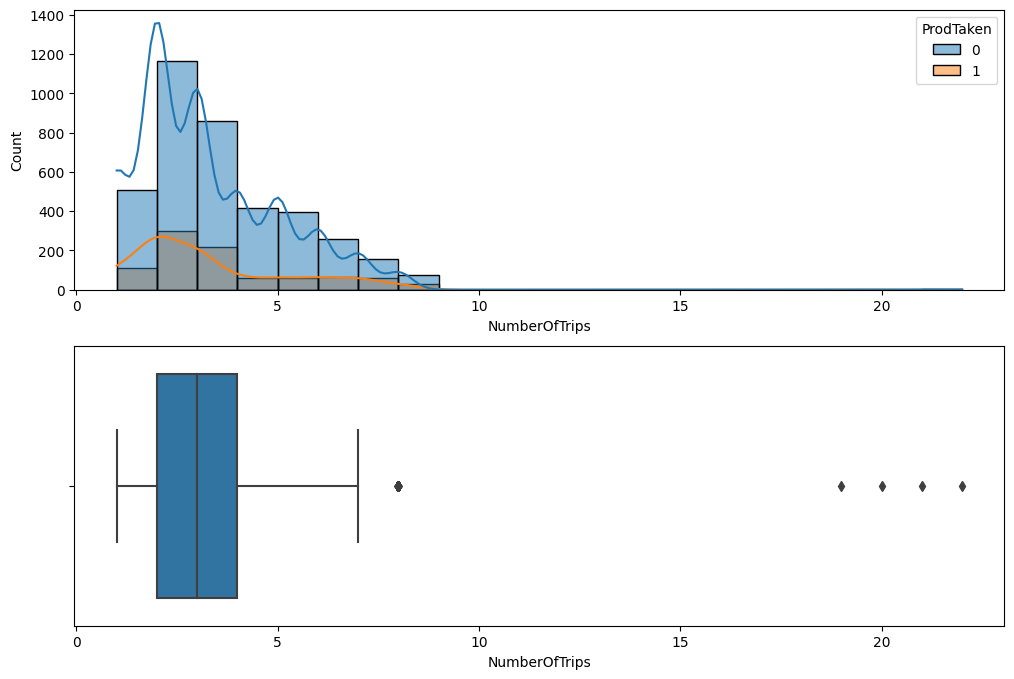

In [212]:
fig,ax = plt.subplots(2,1, figsize=(12, 8))
sns.histplot(data =df,x="NumberOfTrips",binwidth=1,ax=ax[0],kde=True,hue="ProdTaken")
sns.boxplot(data=df,x="NumberOfTrips",ax=ax[1])
plt.show()


Number of trips are right skewed also contains outliers.

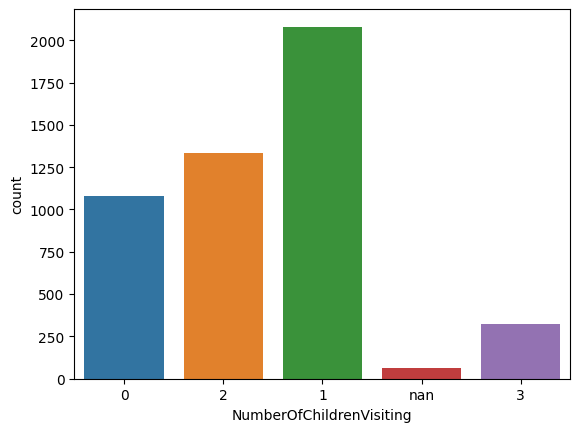

In [213]:
sns.countplot(x=df["NumberOfChildrenVisiting"].astype(str).str.replace(".0",""))
plt.show()

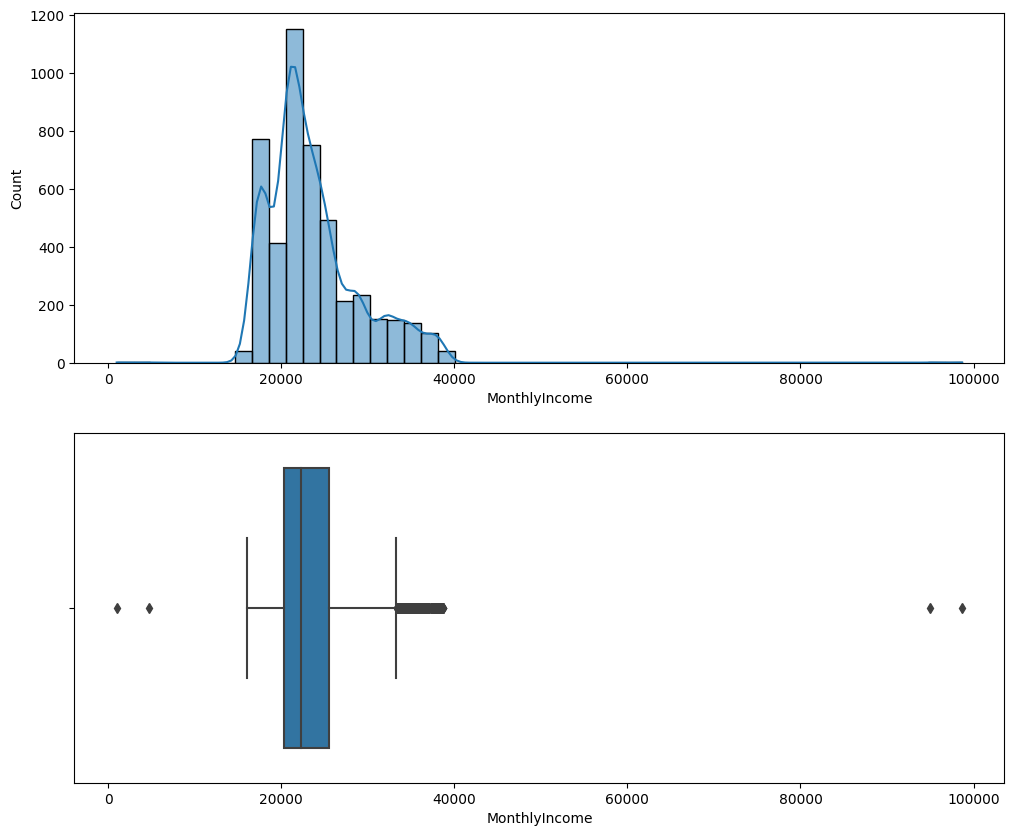

In [214]:
fig,ax= plt.subplots(2,1,figsize=(12,10))
sns.histplot(data=df,x="MonthlyIncome",kde=True,bins=50,ax=ax[0])
sns.boxplot(data=df,x="MonthlyIncome",ax=ax[1])
plt.show()

Monthly Income contains too many outliers. But the data is somewhat symmetric 

In [215]:
df["Gender"] = df["Gender"].str.replace("Fe Male","Female")

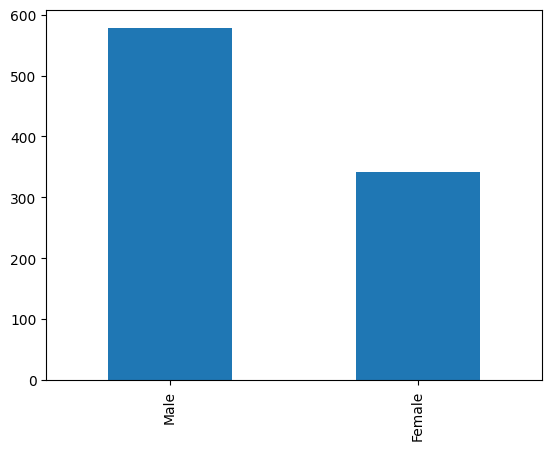

In [216]:
df.query("ProdTaken==1")["Gender"].value_counts().plot(kind="bar")
plt.show()

In [217]:
gender_seg =  pd.crosstab( df["Gender"],
            values=df["ProdTaken"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
gender_seg[1]/gender_seg["All"]

Gender
Female    0.173428
Male      0.198217
All       0.188216
dtype: float64

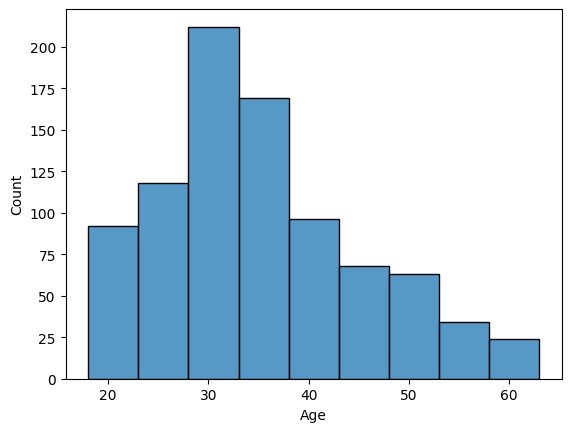

In [218]:


sns.histplot(x=df.query("ProdTaken==1")["Age"],binwidth=5,)
plt.show()

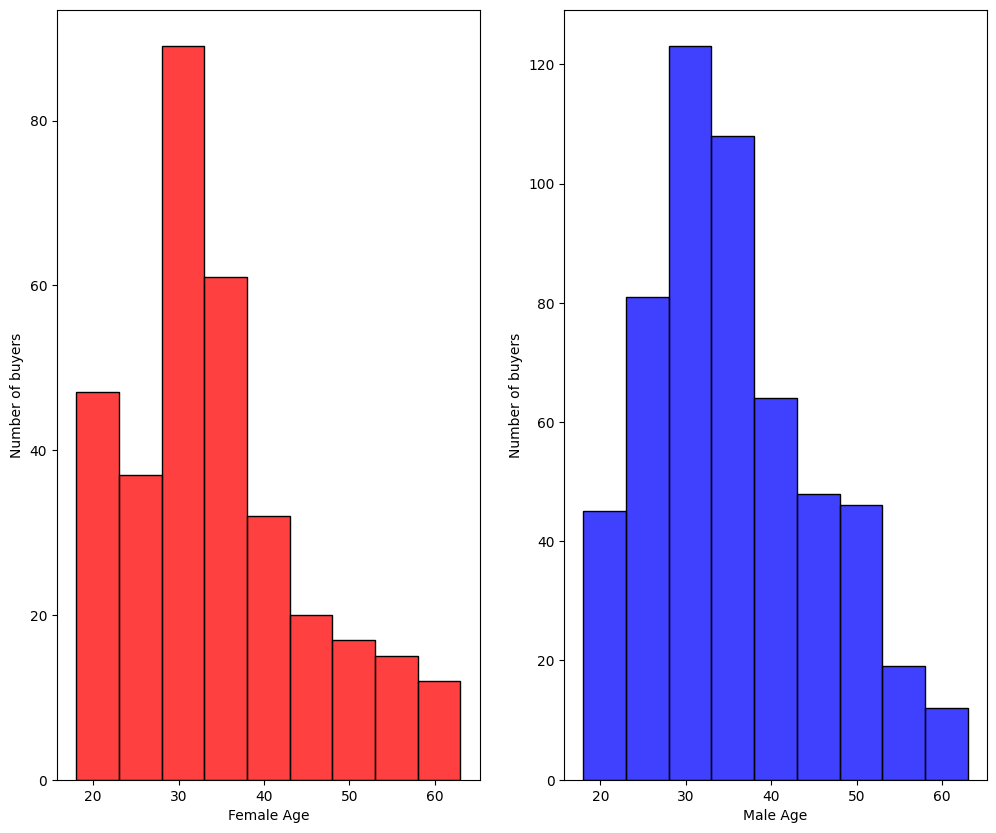

In [219]:
fig, ax = plt.subplots(1,2,figsize=(12,10))
sns.histplot(x=df.query("ProdTaken==1&Gender=='Female'")["Age"],binwidth=5,color="r",ax=ax[0])
ax[0].set_xlabel("Female Age")
ax[0].set_ylabel("Number of buyers")
sns.histplot(x=df.query("ProdTaken==1&Gender=='Male'")["Age"],binwidth=5,color="b",ax=ax[1])
ax[1].set_xlabel("Male Age")
ax[1].set_ylabel("Number of buyers")
plt.show()

Gender doesn;t play role in buying experience. Both Genders have almost similar probability of buying the product.However age does Most of the buyers age between 28-38 irrespective of Gender. But when we drill down to age we  can observe young females are more tend to buy product than male. 

In [220]:
marital_status_seg = pd.crosstab( df["MaritalStatus"],
            values=df["ProdTaken"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
marital_status_seg[1]/marital_status_seg["All"]

MaritalStatus
Divorced     0.130526
Married      0.139316
Single       0.331878
Unmarried    0.243402
All          0.188216
dtype: float64

Singles have a much higher proabability of buying the product as compare to divorced & married. However, we can also observe unmarried(But in relationship) also have less chance of buying a product.

In [221]:
income_twenty_fifth = df["MonthlyIncome"].quantile(0.25)
income_median  =df["MonthlyIncome"].median
income_seventy_fifth = df["MonthlyIncome"].quantile(0.75)

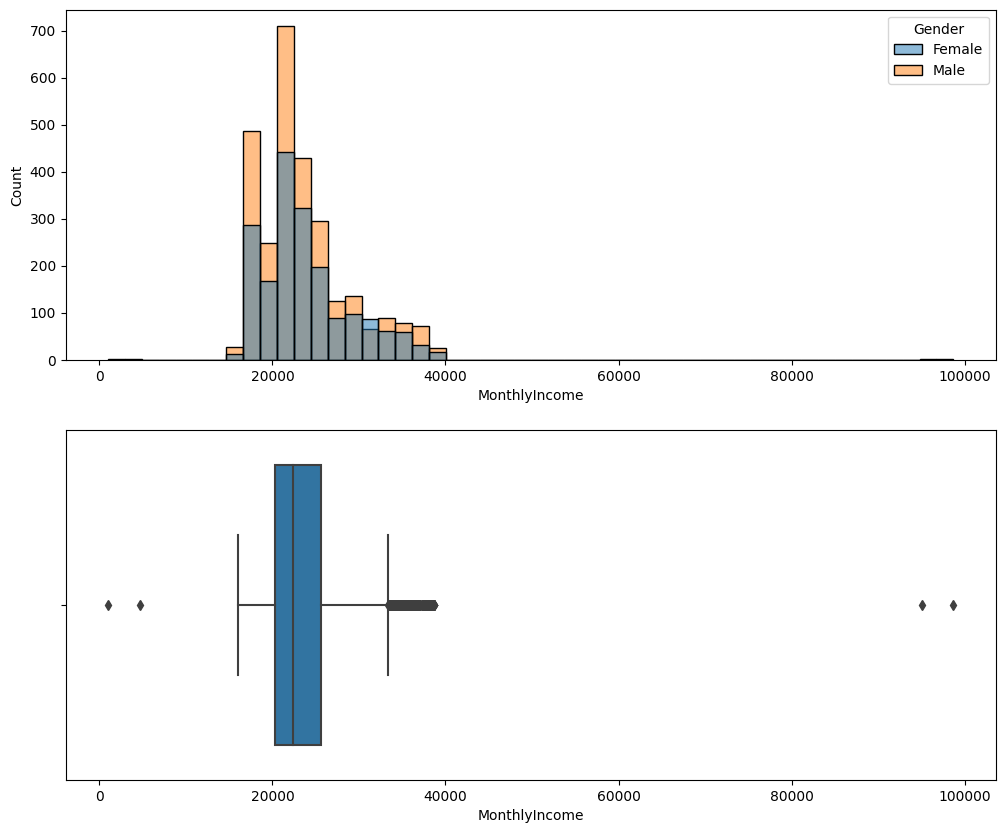

In [222]:
# labels = ["Low-income","Lower-middle class","Middle class","Upper-middle class"]  

# income_ranges = [0, income_twenty_fifth, income_median, income_seventy_fifth, df["MonthlyIncome"].max()]

# # Create income_level
# df["income_level"] = pd.cut(df["MonthlyIncome"],
#                                   bins=income_ranges,
#                                   labels=labels)

# Plot the count of salary levels at companies of different sizes
fig,ax  = plt.subplots(2,1,figsize=(12,10))
sns.histplot(data=df, x="MonthlyIncome",hue="Gender",bins=50,ax=ax[0])
sns.boxplot(data=df, x="MonthlyIncome",ax=ax[1])
plt.show()

In [223]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

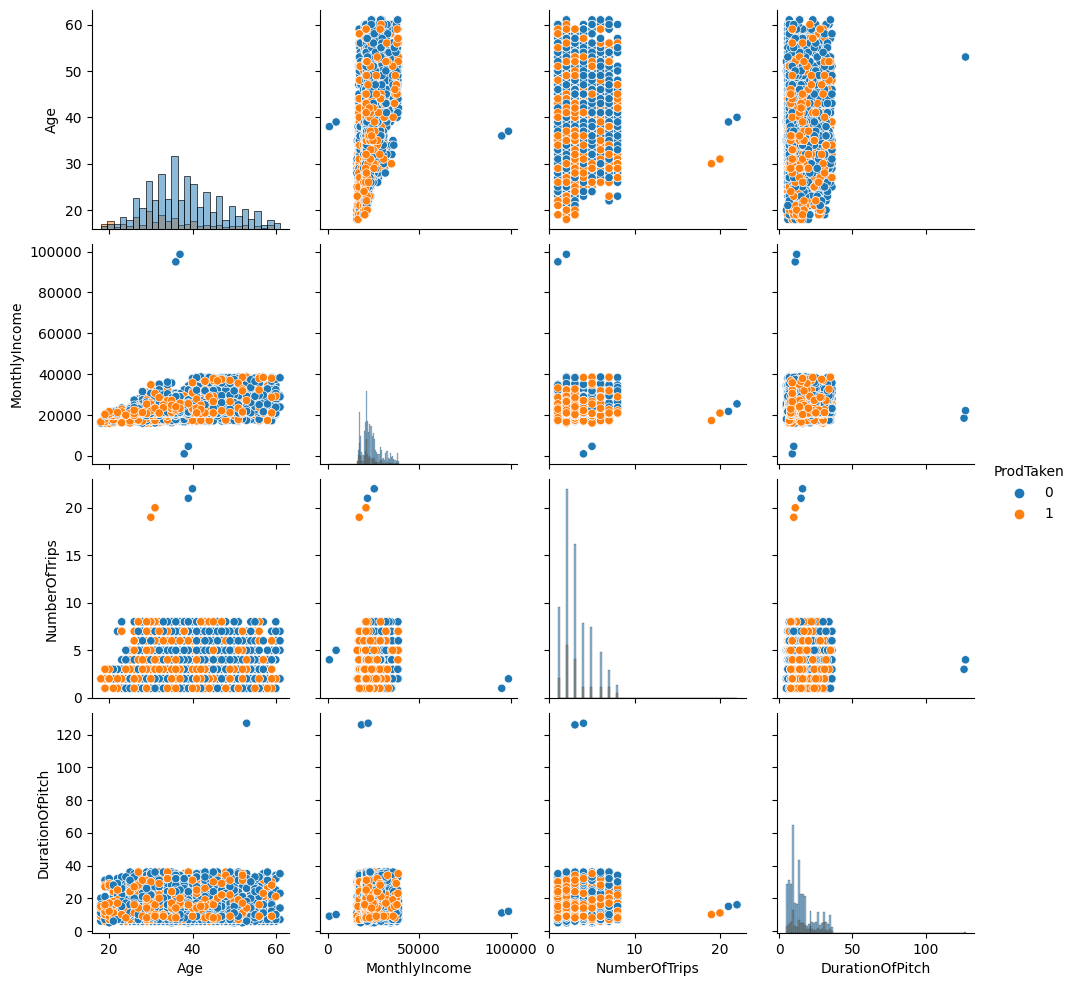

In [224]:
sns.pairplot(data=df,x_vars=["Age","MonthlyIncome","NumberOfTrips","DurationOfPitch"],hue="ProdTaken",y_vars=["Age","MonthlyIncome","NumberOfTrips","DurationOfPitch"],diag_kind="hist")

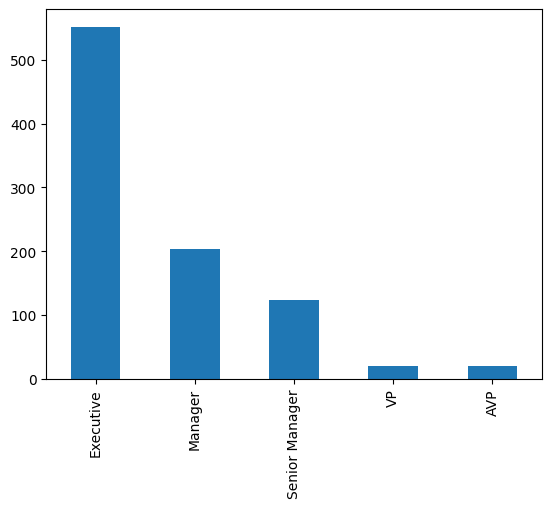

In [225]:
df.query("ProdTaken==1")["Designation"].value_counts().plot(kind="bar") 
plt.show()

In [226]:
designation_seg = pd.crosstab( df["Designation"],
            values=df["ProdTaken"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
designation_seg[1]/designation_seg["All"]

Designation
AVP               0.058480
Executive         0.299674
Manager           0.117783
Senior Manager    0.167116
VP                0.086957
All               0.188216
dtype: float64

It's a strange observation. The higher the designation the lower the chances of buying the product.  

In [227]:
designation_seg = pd.crosstab( df["Designation"],
            values=df["ProdTaken"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
designation_seg[1]/designation_seg["All"]

Designation
AVP               0.058480
Executive         0.299674
Manager           0.117783
Senior Manager    0.167116
VP                0.086957
All               0.188216
dtype: float64

In [228]:
designation_seg = pd.crosstab( df["TypeofContact"],
            values=df["TypeofContact"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
designation_seg[1]/designation_seg["All"]

TypeofContact
Company Invited    0.218464
Self Enquiry       0.176249
All                0.188567
dtype: float64

In [229]:
designation_seg = pd.crosstab( df["ProductPitched"],
            values=df["ProductPitched"],
            columns=df["ProdTaken"], aggfunc="count",margins=True)
designation_seg[1]/designation_seg["All"]

ProductPitched
Basic           0.299674
Deluxe          0.117783
King            0.086957
Standard        0.167116
Super Deluxe    0.058480
All             0.188216
dtype: float64

## Imputataion

In [230]:

missing_cols

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [231]:
# As age is normally distributed we can replace missing values with mean
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [232]:
# Type of Contact has a very less amount of data missing 0.5% so we can replace the missing values with the mode
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0],inplace=True)

In [233]:
# As the data is right skewed we should replace the missing values with median as it is more robust to outliers.
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(),inplace=True)

In [234]:
# Duration of Pitch is right skewed with outliers. 
iqr  = df["DurationOfPitch"].quantile(0.75) - df["DurationOfPitch"].quantile(0.25)
upper_val =  df["DurationOfPitch"].quantile(0.75) + (1.5*iqr) 
lower_val =  df["DurationOfPitch"].quantile(0.25) - (1.5*iqr) 

df["DurationOfPitch"]= np.where(
    df["DurationOfPitch"] > upper_val,
    upper_val,
    np.where(
        df["DurationOfPitch"]  < lower_val,
5,
        df["DurationOfPitch"]  
    )
)

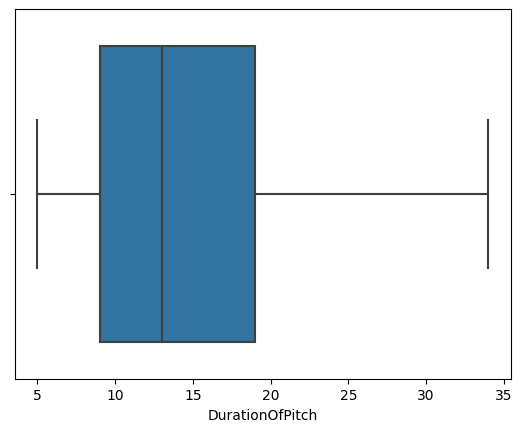

In [235]:
sns.boxplot(data=df,x="DurationOfPitch")
plt.show()

In [236]:
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0],inplace=True)

In [237]:
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].median(),inplace=True)

In [238]:
iqr  = df["NumberOfFollowups"].quantile(0.75) - df["NumberOfFollowups"].quantile(0.25)
upper_val =  df["NumberOfFollowups"].quantile(0.75) + (1.5*iqr) 
lower_val =  df["NumberOfFollowups"].quantile(0.25) - (1.5*iqr) 
print(upper_val,lower_val)

5.5 1.5


In [239]:

df["NumberOfFollowups"]= np.where(
    df["NumberOfFollowups"] > upper_val,
    5,
    np.where(
        df["NumberOfFollowups"]  < lower_val,
1,
        df["NumberOfFollowups"]  
    )
)

In [240]:
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0],inplace=True)

In [241]:
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)

In [242]:

iqr  = df["NumberOfTrips"].quantile(0.75) - df["NumberOfTrips"].quantile(0.25)
upper_val =  df["NumberOfTrips"].quantile(0.75) + (1.5*iqr) 
lower_val =  df["NumberOfTrips"].quantile(0.25) - (1.5*iqr) 
print(lower_val,upper_val)

-1.0 7.0


In [243]:

df["NumberOfTrips"]= np.where(
    df["NumberOfTrips"] > upper_val,
    7,
    np.where(
        df["NumberOfTrips"]  < lower_val,
1,
        df["NumberOfTrips"]  
    )
)

In [244]:
df["NumberOfTrips"].fillna(df["NumberOfTrips"].mode()[0],inplace=True)

In [245]:

iqr  = df["MonthlyIncome"].quantile(0.75) - df["MonthlyIncome"].quantile(0.25)
upper_val =  df["MonthlyIncome"].quantile(0.75) + (1.5*iqr) 
lower_val =  df["MonthlyIncome"].quantile(0.25) - (1.5*iqr) 
print(lower_val,upper_val)

12508.5 33408.5


In [246]:
df["MonthlyIncome"] = np.where(
   df["MonthlyIncome"] > upper_val,
   upper_val,
     np.where(
         df["MonthlyIncome"] < lower_val,
         lower_val,
         df["MonthlyIncome"]
     )
)

In [247]:
df["MonthlyIncome"].fillna(df["MonthlyIncome"].mean(),inplace=True)

In [248]:
missing_cols_perc = df.isnull().mean()*100
missing_cols_perc

ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

In [249]:
df.select_dtypes("object").columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [250]:
df["TypeofContact"].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [251]:
df["Occupation"].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [252]:
df["ProductPitched"].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [253]:
df["MaritalStatus"].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [254]:
df["Designation"].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

Out of these 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus','Designation', we can Encode the (Designation , ProductPitched , Occupation) using Ordinal Encoder. 
And on the remaining (TypeofContact,Gender,MaritalStatus,) We will use One hot encoder

## Model Building

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [256]:
transformer_log = ColumnTransformer(
    transformers=[
   ("ord_trf" ,OrdinalEncoder(categories=[["Basic","Standard","Deluxe","Super Deluxe","King"],
                                          ["Executive","Manager","Senior Manager","AVP","VP"],
                                          ["Salaried","Free Lancer","Small Business","Large Business"]],),
                                          ["ProductPitched","Designation","Occupation"] ),
("ohe_trf",OneHotEncoder(sparse=False,drop="first"),["TypeofContact","Gender","MaritalStatus"])
    ],
    remainder="passthrough"
)

In [257]:
X = df.drop("ProdTaken",axis=1)
y = df["ProdTaken"]

In [258]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y)

In [259]:
X_train_trf = transformer_log.fit_transform(X_train)


In [260]:
X_test_trf=transformer_log.transform(X_test)

In [261]:
log_reg = LogisticRegression()
log_reg.fit(X_train_trf,y_train)
log_reg.score(X_test_trf,y_test)


0.8271983640081799

In [262]:
y_pred = log_reg.predict(X_test_trf)

In [263]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       794
           1       0.61      0.22      0.33       184

    accuracy                           0.83       978
   macro avg       0.73      0.60      0.61       978
weighted avg       0.80      0.83      0.79       978



In [264]:
# param_grid = {'C': np.logspace(1, 3, 10), 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'newton-cg']}

# grid_search = GridSearchCV(log_reg, param_grid, cv=10)

# grid_search.fit(X_train_trf, y_train)

In [265]:
# grid_search.best_estimator_ - C=10.0, solver='newton-cg'

In [266]:
log_reg = LogisticRegression(C=16.68100537200059, solver='newton-cg')
log_reg.fit(X_train_trf,y_train)
log_reg.score(X_test_trf,y_test)


0.8425357873210634

In [267]:
y_pred = log_reg.predict(X_test_trf)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       794
           1       0.70      0.29      0.41       184

    accuracy                           0.84       978
   macro avg       0.78      0.63      0.66       978
weighted avg       0.83      0.84      0.81       978



In [268]:
transformer_log_scaled = ColumnTransformer(
    transformers=[
   ("ord_trf" ,OrdinalEncoder(categories=[["Basic","Standard","Deluxe","Super Deluxe","King"],
                                          ["Executive","Manager","Senior Manager","AVP","VP"],
                                          ["Salaried","Free Lancer","Small Business","Large Business"]],),
                                          ["ProductPitched","Designation","Occupation"] ),
("ohe_trf",OneHotEncoder(sparse=False,drop="first"),["TypeofContact","Gender","MaritalStatus"],),
("scale_trf",StandardScaler(),["MonthlyIncome","DurationOfPitch"])
    ],
    remainder="passthrough"
)

In [269]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled= train_test_split(X,y,test_size=0.2,stratify=y)
X_train_trf_scaled = transformer_log_scaled.fit_transform(X_train)
X_test_trf_scaled=transformer_log_scaled.transform(X_test)
log_reg = LogisticRegression(C=10.0, solver='newton-cg')
log_reg.fit(X_train_trf_scaled,y_train_scaled)
log_reg.score(X_test_trf_scaled,y_test_scaled)


0.8118609406952966

In [270]:
y_pred = log_reg.predict(X_test_trf)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       794
           1       0.00      0.00      0.00       184

    accuracy                           0.81       978
   macro avg       0.41      0.50      0.45       978
weighted avg       0.66      0.81      0.73       978



In [271]:
df.select_dtypes("object").columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [272]:
df.select_dtypes("number").columns

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

## Feature Selection

#### ANNOVA 

In [273]:
transformer_annova = ColumnTransformer(
    transformers=[
   ("ord_trf" ,OrdinalEncoder(categories=[["Basic","Standard","Deluxe","Super Deluxe","King"],
                                          ["Executive","Manager","Senior Manager","AVP","VP"],
                                          ["Salaried","Free Lancer","Small Business","Large Business"]],),
                                          ["ProductPitched","Designation","Occupation"] ),
("ohe_trf",OneHotEncoder(sparse=False,drop="first"),["TypeofContact","Gender","MaritalStatus"]),
("scale_trf",StandardScaler(),['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'])
    ],
    remainder="passthrough"
)
transformer_annova.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_trf',
                                 OrdinalEncoder(categories=[['Basic',
                                                             'Standard',
                                                             'Deluxe',
                                                             'Super Deluxe',
                                                             'King'],
                                                            ['Executive',
                                                             'Manager',
                                                             'Senior Manager',
                                                             'AVP', 'VP'],
                                                            ['Salaried',
                                                             'Free Lancer',
                                                             'Small Business',
                                                             'Large '
                                                             'Business']]),
                                 ['ProductPitched', 'Designation',
                                  'Occupation']),
                                ('ohe_trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['TypeofContact', 'Gender', 'MaritalStatus']),
                                ('scale_trf', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfPersonVisiting', 'NumberOfFollowups',
                                  'PreferredPropertyStar', 'NumberOfTrips',
                                  'Passport', 'PitchSatisfactionScore',
                                  'OwnCar', 'NumberOfChildrenVisiting',
                                  'MonthlyIncome'])])

In [274]:
X_train_annova,X_test_annova,y_train_annova,y_test_annova= train_test_split(X,y,test_size=0.2,stratify=y)
X_train_trf_annova = transformer_annova.fit_transform(X_train)
X_test_trf_annova=transformer_annova.transform(X_test)



In [275]:
X_train_trf_annova

,ord_trf__ProductPitched,ord_trf__Designation,ord_trf__Occupation,ohe_trf__TypeofContact_Self Enquiry,ohe_trf__Gender_Male,ohe_trf__MaritalStatus_Married,ohe_trf__MaritalStatus_Single,ohe_trf__MaritalStatus_Unmarried,scale_trf__Age,scale_trf__CityTier,scale_trf__DurationOfPitch,scale_trf__NumberOfPersonVisiting,scale_trf__NumberOfFollowups,scale_trf__PreferredPropertyStar,scale_trf__NumberOfTrips,scale_trf__Passport,scale_trf__PitchSatisfactionScore,scale_trf__OwnCar,scale_trf__NumberOfChildrenVisiting,scale_trf__MonthlyIncome
4535,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.068509,1.475817,-1.044749,0.132942,0.342762,-0.724876,-0.090787,1.57339,-0.063848,0.770271,0.965915,0.315947
3203,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.908671,0.381686,1.978821,0.132942,0.342762,0.529779,-0.090787,-0.63557,0.668248,-1.298245,-0.216159,-0.557316
1055,3.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,-0.394235,-0.712444,0.719000,0.132942,-0.710853,1.784434,-1.270109,-0.63557,0.668248,0.770271,0.965915,1.862819
2477,2.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.257218,1.475817,-0.414839,0.132942,0.342762,-0.724876,1.088536,-0.63557,-0.795944,-1.298245,0.965915,-0.577064
2549,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.428729,0.381686,-0.792785,0.132942,1.396376,-0.724876,-0.680448,-0.63557,-0.795944,0.770271,0.965915,2.166964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.800096,-0.712444,-0.918767,0.132942,0.342762,-0.724876,-0.680448,-0.63557,-0.063848,0.770271,-1.398234,-1.334441
1189,2.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.502811,1.475817,-0.918767,0.132942,-0.710853,-0.724876,-0.680448,-0.63557,-0.063848,0.770271,-0.216159,-0.633270
145,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,-0.828538,-0.712444,-0.540821,-1.249517,-0.710853,1.784434,1.678197,-0.63557,1.400344,0.770271,-0.216159,-1.132619
2000,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.154264,-0.712444,-1.170731,0.132942,-0.710853,1.784434,-0.680448,-0.63557,0.668248,-1.298245,0.965915,-0.219426


In [276]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest 

sel_annova = SelectKBest(f_classif,k=12).fit(X_train_trf_annova,y_train)

In [277]:
sel_annova.get_support()

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True])

In [278]:
columns = X_train_trf_annova.columns[sel_annova.get_support()]

In [279]:
X_train_trf_annova = sel_annova.transform(X_train_trf_annova)
X_test_trf_annova = sel_annova.transform(X_test_trf_annova)



In [280]:
X_train_trf_annova = pd.DataFrame(X_train_trf_annova,columns =columns)
X_test_trf_annova = pd.DataFrame(X_test_trf_annova,columns=columns)

In [284]:
X_train_trf_annova

,ord_trf__ProductPitched,ord_trf__Designation,ohe_trf__MaritalStatus_Married,ohe_trf__MaritalStatus_Single,ohe_trf__MaritalStatus_Unmarried,scale_trf__Age,scale_trf__CityTier,scale_trf__DurationOfPitch,scale_trf__NumberOfFollowups,scale_trf__PreferredPropertyStar,scale_trf__Passport,scale_trf__MonthlyIncome
0,2.0,1.0,1.0,0.0,0.0,-0.068509,1.475817,-1.044749,0.342762,-0.724876,1.57339,0.315947
1,0.0,0.0,0.0,1.0,0.0,0.908671,0.381686,1.978821,0.342762,0.529779,-0.63557,-0.557316
2,3.0,3.0,1.0,0.0,0.0,-0.394235,-0.712444,0.719000,-0.710853,1.784434,-0.63557,1.862819
3,2.0,1.0,0.0,0.0,0.0,0.257218,1.475817,-0.414839,0.342762,-0.724876,-0.63557,-0.577064
4,4.0,4.0,0.0,0.0,0.0,2.428729,0.381686,-0.792785,1.396376,-0.724876,-0.63557,2.166964
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,0.0,1.0,0.0,0.800096,-0.712444,-0.918767,0.342762,-0.724876,-0.63557,-1.334441
3906,2.0,1.0,1.0,0.0,0.0,-0.502811,1.475817,-0.918767,-0.710853,-0.724876,-0.63557,-0.633270
3907,0.0,0.0,1.0,0.0,0.0,-0.828538,-0.712444,-0.540821,-0.710853,1.784434,-0.63557,-1.132619
3908,1.0,2.0,1.0,0.0,0.0,-1.154264,-0.712444,-1.170731,-0.710853,1.784434,-0.63557,-0.219426


In [285]:
log_reg = LogisticRegression(C=10.0, solver='newton-cg')
log_reg.fit(X_train_trf_annova,y_train_annova)
log_reg.score(X_test_trf_annova,y_test_annova)


0.8118609406952966

In [286]:
y_pred = log_reg.predict(X_test_trf_annova)
print(classification_report(y_true=y_test_annova,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       794
           1       0.00      0.00      0.00       184

    accuracy                           0.81       978
   macro avg       0.41      0.50      0.45       978
weighted avg       0.66      0.81      0.73       978



##  Decision Trees

In [287]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
descionTree_trf = ColumnTransformer(
    transformers=[
   ("ord_trf" ,OrdinalEncoder(categories=[["Basic","Standard","Deluxe","Super Deluxe","King"],
                                          ["Executive","Manager","Senior Manager","AVP","VP"],
                                          ["Salaried","Free Lancer","Small Business","Large Business"]],),
                                          ["ProductPitched","Designation","Occupation"] ),
("ohe_trf",OneHotEncoder(sparse=False,drop="first"),["TypeofContact","Gender","MaritalStatus"]),

    ],
    remainder="passthrough"
)


descionTree_trf.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_trf',
                                 OrdinalEncoder(categories=[['Basic',
                                                             'Standard',
                                                             'Deluxe',
                                                             'Super Deluxe',
                                                             'King'],
                                                            ['Executive',
                                                             'Manager',
                                                             'Senior Manager',
                                                             'AVP', 'VP'],
                                                            ['Salaried',
                                                             'Free Lancer',
                                                             'Small Business',
                                                             'Large '
                                                             'Business']]),
                                 ['ProductPitched', 'Designation',
                                  'Occupation']),
                                ('ohe_trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['TypeofContact', 'Gender', 'MaritalStatus'])])

In [294]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt= train_test_split(X,y,test_size=0.2,stratify=y)
X_train_trf_dt = descionTree_trf.fit_transform(X_train_dt)
X_test_trf_dt=descionTree_trf.transform(X_test_dt)


In [296]:
dt = DecisionTreeClassifier()
dt.fit(X_train_trf_dt,y_train_dt)
dt.score(X_test_trf_dt,y_test_dt)

0.9069529652351738

In [297]:
y_pred = dt.predict(X_test_trf_dt)
print(classification_report(y_true=y_test_dt,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       794
           1       0.75      0.76      0.75       184

    accuracy                           0.91       978
   macro avg       0.85      0.85      0.85       978
weighted avg       0.91      0.91      0.91       978



### Random Forest

In [298]:
randomForest_trf = ColumnTransformer(
    transformers=[
   ("ord_trf" ,OrdinalEncoder(categories=[["Basic","Standard","Deluxe","Super Deluxe","King"],
                                          ["Executive","Manager","Senior Manager","AVP","VP"],
                                          ["Salaried","Free Lancer","Small Business","Large Business"]],),
                                          ["ProductPitched","Designation","Occupation"] ),
("ohe_trf",OneHotEncoder(sparse=False,drop="first"),["TypeofContact","Gender","MaritalStatus"]),

    ],
    remainder="passthrough"
)

randomForest_trf.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_trf',
                                 OrdinalEncoder(categories=[['Basic',
                                                             'Standard',
                                                             'Deluxe',
                                                             'Super Deluxe',
                                                             'King'],
                                                            ['Executive',
                                                             'Manager',
                                                             'Senior Manager',
                                                             'AVP', 'VP'],
                                                            ['Salaried',
                                                             'Free Lancer',
                                                             'Small Business',
                                                             'Large '
                                                             'Business']]),
                                 ['ProductPitched', 'Designation',
                                  'Occupation']),
                                ('ohe_trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['TypeofContact', 'Gender', 'MaritalStatus'])])

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf= train_test_split(X,y,test_size=0.2,stratify=y)
X_train_trf_rf = descionTree_trf.fit_transform(X_train_rf)
X_test_trf_rf=descionTree_trf.transform(X_test_rf)

In [301]:
rf = RandomForestClassifier()
rf.fit(X_train_trf_rf,y_train_rf)
rf.score(X_test_trf_rf,y_test_rf)

0.9151329243353783

In [302]:
y_pred = dt.predict(X_test_trf_rf)
print(classification_report(y_true=y_test_rf,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       794
           1       0.94      0.95      0.94       184

    accuracy                           0.98       978
   macro avg       0.96      0.97      0.96       978
weighted avg       0.98      0.98      0.98       978



Checking overfitting & Underfitting